# Circular Board Prize Probabilities

## Dynamic programming

In [1]:
import itertools
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def position(n):
    return (13 + n) % 14 + 1

def dice_sum_probabilities(x):
    sum_counter = collections.Counter({0: 1})
    for _ in range(x):
        next_sum_counts = collections.Counter()
        for current_sum in sum_counter:
            for roll in range(1, 7):
                next_sum_counts[current_sum + roll] += sum_counter[current_sum]
        sum_counter = next_sum_counts
    total = 6 ** x
    return {dice_sum: count / total for dice_sum, count in sum_counter.items()}
    
def compute_probability(x, y):
    sum_probabilities = dice_sum_probabilities(x)
    return sum(p for n, p in sum_probabilities.items() if position(n) == y)

In [3]:
positions = range(1, 15)
df = pd.DataFrame({'Space': positions})

for X in [3, 6, 15]:
    df[f'P(X={X})'] = df['Space'].apply(lambda p: compute_probability(X, p))

In [4]:
df

,Space,P(X=3),P(X=6),P(X=15)
0,1,0.046296,0.051912,0.070874
1,2,0.027778,0.057935,0.070429
2,3,0.018519,0.066615,0.070182
3,4,0.018519,0.076239,0.070182
4,5,0.027778,0.084919,0.070429
5,6,0.046296,0.090942,0.070874
6,7,0.069444,0.093107,0.071429
7,8,0.097222,0.090942,0.071983
8,9,0.115741,0.084919,0.072428
9,10,0.125000,0.076239,0.072675


$P(X=3)$ for space 5 is consistent to result in analytical solution

In [5]:
df["P(X=6)"].sum()

np.float64(0.9999999999999999)

Checking that probabilities sum to 1

## Monte Carlo modeling

In [6]:
num_trials = 10_000_000

def simulate_game(n):
    rolls = np.random.randint(1, 7, size=(num_trials, n)).sum(axis=1)
    positions = ((13 + rolls) % 14) + 1
    counts = np.bincount(positions, minlength=15)[1:15]
    probabilities = counts / num_trials
    return probabilities

In [7]:
positions = range(1, 15)
df_sim = pd.DataFrame(index=positions)

for X in [3, 6, 15]:
    probabilities = simulate_game(X)
    df_sim[f'P(X={X})'] = probabilities

In [8]:
df_sim

,P(X=3),P(X=6),P(X=15)
1,0.046244,0.051924,0.070941
2,0.027788,0.057919,0.070463
3,0.018451,0.066518,0.070177
4,0.018505,0.076191,0.070098
5,0.027811,0.084844,0.070523
6,0.046394,0.090893,0.070922
7,0.069512,0.093207,0.071476
8,0.097301,0.090988,0.072148
9,0.115722,0.085033,0.072271
10,0.125223,0.076238,0.072532


In [9]:
df_sim["P(X=15)"].sum()

np.float64(1.0)

## Distributions

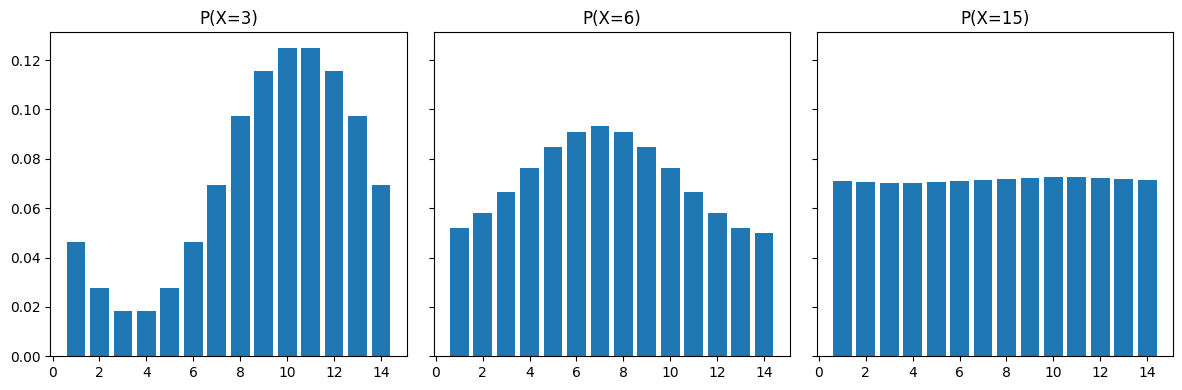

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

for ax, X in zip(axs, [3, 6, 15]):
    col = f'P(X={X})'
    ax.bar(df['Space'], df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()